In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
def exponential_smoothing(series, alpha):
    results = np.zeros_like(series)
    results[0] = series[0] 
    for t in range(1, series.shape[0]):
        results[t] = alpha * series[t] + (1 - alpha) * results[t - 1]

    return results

In [3]:
def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(15, 7))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label='Alpha {}'.format(alpha))
        print(smape(exponential_smoothing(series, alpha), series))
    plt.plot(series, label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Exponential Smoothing')
    plt.grid(True)

In [4]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [9]:
def double_exponential_smoothing(series, alpha, beta, n_preds):
    n_record = series.shape[0]
    results = np.zeros(n_record + n_preds)
    level = series[0]
    results[0] = series[0]
    trend = series[1] - series[0]
    for t in range(1, n_record + 1):
        if t >= n_record:
            value = results[t - 1]
        else:
            value = series[t]

        previous_level = level
        level = alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - previous_level) + (1 - beta) * trend 
        results[t] = level + trend
    if n_preds > 1:
        results[n_record + 1:] = level + np.arange(2, n_preds + 1) * trend

    return results

In [10]:
def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(20, 8))
    for alpha, beta in zip(alphas, betas):
        results = double_exponential_smoothing(series, alpha, beta, 1)
        print(smape(results[:-1], series))
        plt.plot(results, label='Alpha {}, beta {}'.format(alpha, beta))

    plt.plot(series, label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Double Exponential Smoothing')
    plt.grid(True)

17.121332898432364
2.7469803336260807


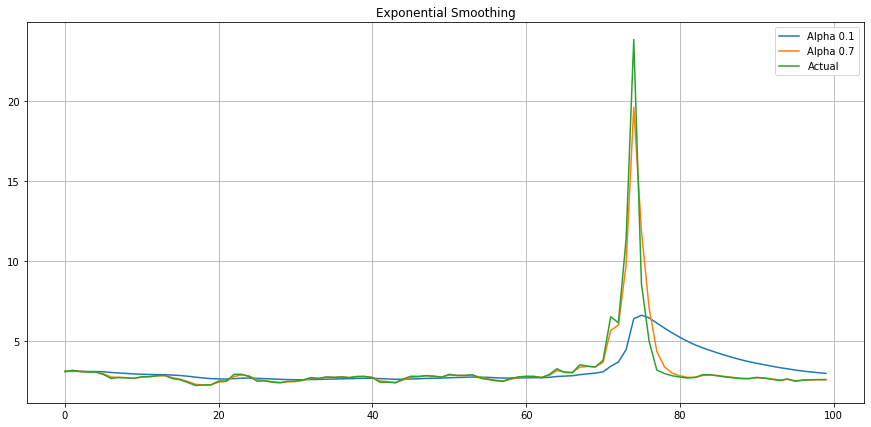

In [11]:
data = pd.read_csv('./data/daily.csv')
series = data.Price[6000:6100]
data.head()
plot_exponential_smoothing(series.values, alphas=[0.1, 0.7])
# plot_exponential_smoothing(series.values, alphas=[0.6])
# results = double_exponential_smoothing(series, 0.9, 0.9)
# plt.plot(results, label='Alpha {}, beta {}'.format(0.9, 0.1))

In [2]:
data = pd.read_csv('./data/daily.csv')
y = data.Price[:6100]
data.reset_index(inplace = True)
x = np.array(data.Price[6100:])


from predictSES import exponentialSmoothing

m = exponentialSmoothing()
m.fit(x)
# pred, l = m.predict(y)
# pred = m.forecast(len(x))
# plt.figure(figsize=(16, 8))
# res = pd.DataFrame(data={'Actual': y, 'Prediction': pred})
# plt.plot(res)
# plt.show()
# res.head()

alpha: 0.999
